In [28]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)

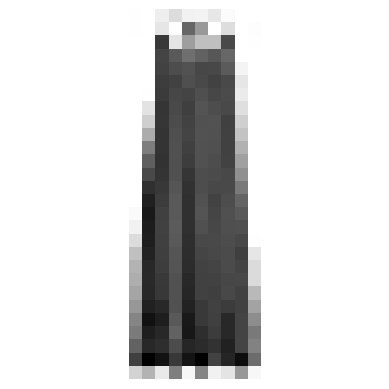

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2137], cmap='binary')
plt.axis('off')
plt.show()

In [3]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[2137]]

'sukienka'

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
import os
import time

log = os.path.join("image_logs", time.strftime("fit_%Y_%m_%d-%H_%M_%S"))
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log)
history = model.fit(X_train, y_train, epochs=20,
                    validation_split=0.1,
                    callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6895 - loss: 0.9817 - val_accuracy: 0.8168 - val_loss: 0.5253
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8294 - loss: 0.5007 - val_accuracy: 0.8057 - val_loss: 0.5348
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8427 - loss: 0.4501 - val_accuracy: 0.8478 - val_loss: 0.4229
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.8538 - loss: 0.4214 - val_accuracy: 0.8523 - val_loss: 0.4081
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.8587 - loss: 0.4021 - val_accuracy: 0.8518 - val_loss: 0.4167
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8640 - loss: 0.3846 - val_accuracy: 0.8578 - val_loss: 0.4079
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8710 - loss: 0.3714 - val_accuracy: 0.8590 - val_loss: 0.3945
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.8738 - l

In [24]:
import numpy as np

image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [8]:
model.save("fashion_clf.keras")

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
housing.data.shape

(20640, 8)

In [10]:
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape, X_val.shape, X_test.shape)

(14860, 8) (1652, 8) (4128, 8)


In [11]:
print(X_train_scaled.shape)  
print(X_val_scaled.shape)    


(14860, 8)
(1652, 8)


In [12]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,601 (21.88 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from keras.src.metrics import RootMeanSquaredError

model2.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=[RootMeanSquaredError()])

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)


In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="housing_logs", histogram_freq=1)

history2 = model2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1,
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[early_stopping, tensorboard_callback])

history3 = model2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[early_stopping, tensorboard_callback])



Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - loss: 1.3093 - root_mean_squared_error: 1.1100 - val_loss: 0.4497 - val_root_mean_squared_error: 0.6706
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4090 - root_mean_squared_error: 0.6395 - val_loss: 0.3965 - val_root_mean_squared_error: 0.6296
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3828 - root_mean_squared_error: 0.6183 - val_loss: 0.3726 - val_root_mean_squared_error: 0.6104
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.3345 - root_mean_squared_error: 0.5783 - val_loss: 0.3516 - val_root_mean_squared_error: 0.5929
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3258 - root_mean_squared_error: 0.5707 - val_loss: 0.3443 - val_root_mean_squared_error: 0.5868
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.3044 - root_mean_squared_error: 0.5516 - val_loss: 0.3371 - val_root_mean_squared_error: 0.5806
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
model2.save("reg_housing_1.keras")

In [17]:
from keras.src.layers import Dense

inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model3 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model3.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=[RootMeanSquaredError()])
history4 = model3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[early_stopping, tensorboard_callback])


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 1.4012 - root_mean_squared_error: 1.1485 - val_loss: 0.4300 - val_root_mean_squared_error: 0.6557
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.3705 - root_mean_squared_error: 0.6086 - val_loss: 0.3915 - val_root_mean_squared_error: 0.6257
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.3551 - root_mean_squared_error: 0.5958 - val_loss: 0.3638 - val_root_mean_squared_error: 0.6032
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.3467 - root_mean_squared_error: 0.5886 - val_loss: 0.3678 - val_root_mean_squared_error: 0.6065
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.3292 - root_mean_squared_error: 0.5736 - val_loss: 0.3691 - val_root_mean_squared_error: 0.6075
Epoch 5: early stopping


In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="housing_logs/model3", histogram_freq=1)

In [20]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(70, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(80, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model4 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model4.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=[RootMeanSquaredError()])
model4.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                      validation_data=(X_val_scaled, y_val),
           callbacks=[early_stopping, tensorboard_callback])

Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - loss: 1.1197 - root_mean_squared_error: 1.0158 - val_loss: 0.4238 - val_root_mean_squared_error: 0.6510
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.3721 - root_mean_squared_error: 0.6100 - val_loss: 0.4120 - val_root_mean_squared_error: 0.6419
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.3461 - root_mean_squared_error: 0.5878 - val_loss: 0.3408 - val_root_mean_squared_error: 0.5837
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.3201 - root_mean_squared_error: 0.5657 - val_loss: 0.3653 - val_root_mean_squared_error: 0.6044
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.3317 - root_mean_squared_error: 0.5744 - val_loss: 0.3545 - val_root_mean_squared_error: 0.5954
Epoch 5: early stopping


In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="housing_logs/model4", histogram_freq=1)

In [23]:
model3.save("reg_housing_2.keras")
model4.save("reg_housing_3.keras")